In [12]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "2a-data"

# **UE22CS342AA2- Data Analytics - Worksheet 2a - Simple Linear and Multiple Linear Regression**

Sanjana S - sanjanasuresh2709@gmail.com

**Academic Excellence Analysis Task**

In today's competitive educational landscape, understanding the factors that contribute to student success is more important than ever. Educators and policymakers are constantly seeking ways to enhance learning outcomes and support students in achieving their full potential. By analyzing various elements that influence academic performance, we can uncover valuable insights and develop effective strategies to improve educational practices.

Your task is to analyze the dataset to uncover the factors influencing academic success. By examining various predictors and their impact on the performance index, you can provide valuable insights that can help educators and students optimize learning strategies.

## Regression

Regression is a statistical method used to model the connection between variables, understanding how changes in one influence another. It's vital for predicting outcomes, finding patterns, and making informed decisions. 

In this worksheet we will be exploring 2 concepts. Namely:

  - Simple Linear Regression
  
  - Multiple Linear Regression
  
 

Before we go any further, let's have a look at the dataset and it's different columns

**Data Dictionary**

The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
* Learning Hours: The total number of hours spent studying by each student.
* Previous Exam Scores: The scores obtained by students in previous exams.
* Club Participation: Whether the student participates in any club activities (Yes or No).
* Daily Rest Hours: The average number of hours of sleep the student had per day.
* Practice Tests Taken: The number of sample question papers the student practiced.

Target Variable:
* Academic Performance Index: A measure of the overall performance of each student.It represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


## Data Visualising

Let's visualize this all in the form of a Data Frame

In [13]:
data <- read.csv("/kaggle/input/2a-data/2a-data.csv")
head(data)

,Learning_Hours,Previous_Exam_Scores,Club_Participation,Daily_Rest_Hours,Practice_Tests_Taken,Academic_Performance_Score
,<int>,<int>,<chr>,<int>,<int>,<int>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


In [14]:
summary(data)

 Learning_Hours  Previous_Exam_Scores Club_Participation Daily_Rest_Hours
 Min.   :1.000   Min.   :40.00        Length:10000       Min.   :4.000   
 1st Qu.:3.000   1st Qu.:54.00        Class :character   1st Qu.:5.000   
 Median :5.000   Median :69.00        Mode  :character   Median :7.000   
 Mean   :4.993   Mean   :69.45                           Mean   :6.531   
 3rd Qu.:7.000   3rd Qu.:85.00                           3rd Qu.:8.000   
 Max.   :9.000   Max.   :99.00                           Max.   :9.000   
 Practice_Tests_Taken Academic_Performance_Score
 Min.   :0.000        Min.   : 10.00            
 1st Qu.:2.000        1st Qu.: 40.00            
 Median :5.000        Median : 55.00            
 Mean   :4.583        Mean   : 55.22            
 3rd Qu.:7.000        3rd Qu.: 71.00            
 Max.   :9.000        Max.   :100.00            

## Regression Analysis


### 1. Simple Linear Regression

Educators want to know if previous academic performance is often a strong indicator of future academic success.<br> <br>
**a)** Create a scatter plot between the dependent variable-Previous_Exam_Score and independent variable-Academic_Performance_Score with the best-fit line passing through.            (1 mark)

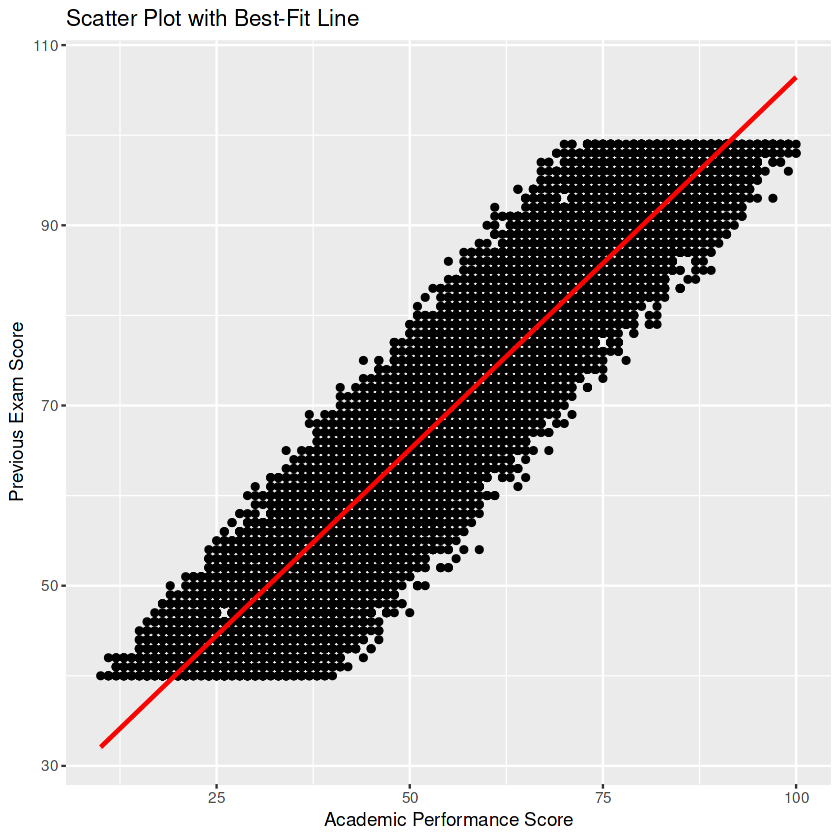

In [15]:

library(ggplot2)
ggplot(data,aes(x = Academic_Performance_Score,y=Previous_Exam_Scores))+ geom_point()+geom_smooth(method = "lm",formula = y ~ x,color = "red") + labs(
    title = "Scatter Plot with Best-Fit Line",
    x = "Academic Performance Score",
    y = "Previous Exam Score"
  )

What do you infer from the graph?             

**b)** Build a linear regression model to predict performance index based on previous scores  (1 mark).

In [16]:
library(dplyr)

model <- lm(Academic_Performance_Score ~ Previous_Exam_Scores,data = data)
summary(model)


Call:
lm(formula = Academic_Performance_Score ~ Previous_Exam_Scores, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -15.181799   0.319605   -47.5   <2e-16 ***
Previous_Exam_Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


**c)** Check if this model follows OLS assumptions.              (3 marks)


1. Linearity:Check if the relationship between the independent and dependent variables is linear by visualizing the residuals.


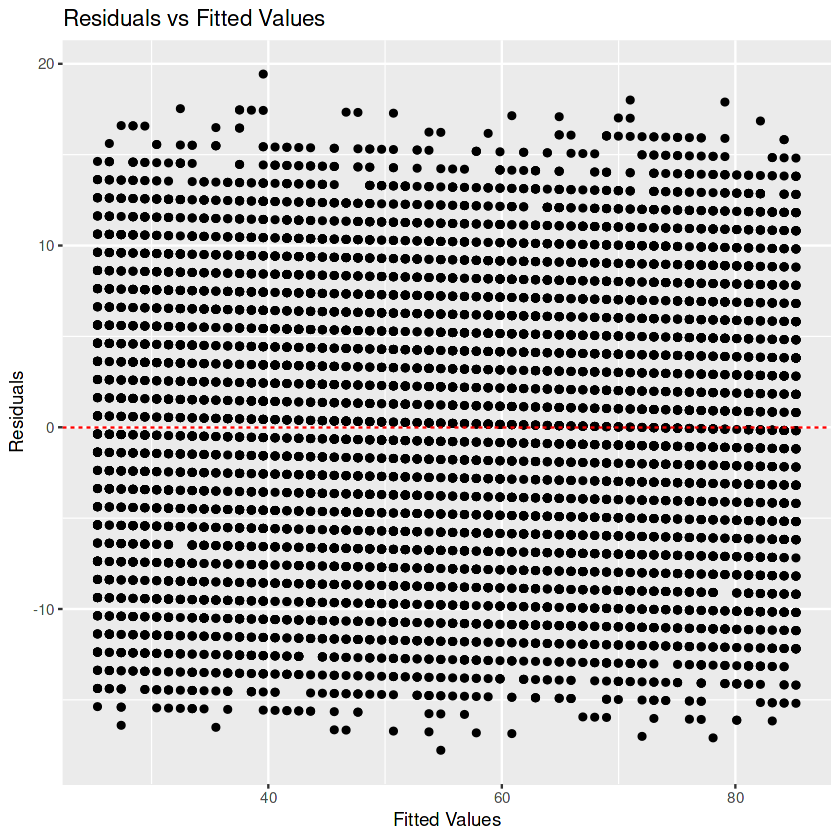

In [17]:
# Load necessary library
library(ggplot2)

# Plot residuals vs fitted values to check linearity
fitted_values <- fitted(model)
residuals <- residuals(model)

ggplot(data, aes(x = fitted_values, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Residuals vs Fitted Values",
    x = "Fitted Values",
    y = "Residuals"
  )


2.Homescedasticity:Check if the residuals have constant variance

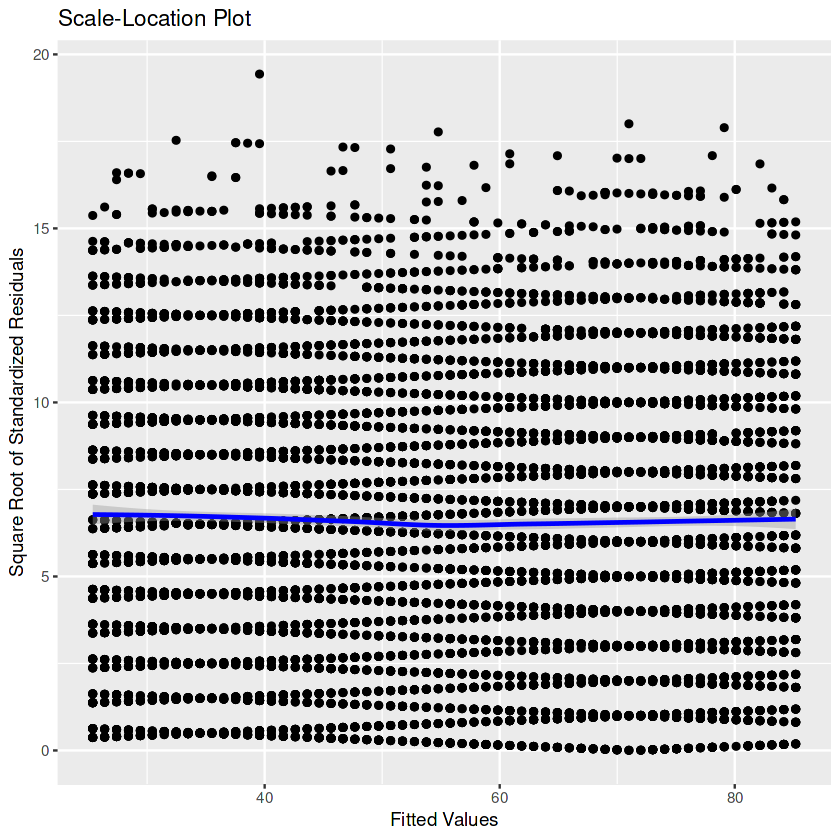

In [18]:
# Residuals vs Fitted Values plot
ggplot(data, aes(x = fitted_values, y = abs(residuals))) +
  geom_point() +
  geom_smooth(method = "loess",formula = 'y ~ x', color = "blue") +
  labs(
    title = "Scale-Location Plot",
    x = "Fitted Values",
    y = "Square Root of Standardized Residuals"
  )

3.Normality: A histogram of the residuals helps visualize their distribution. A normal distribution will typically look bell-shaped.

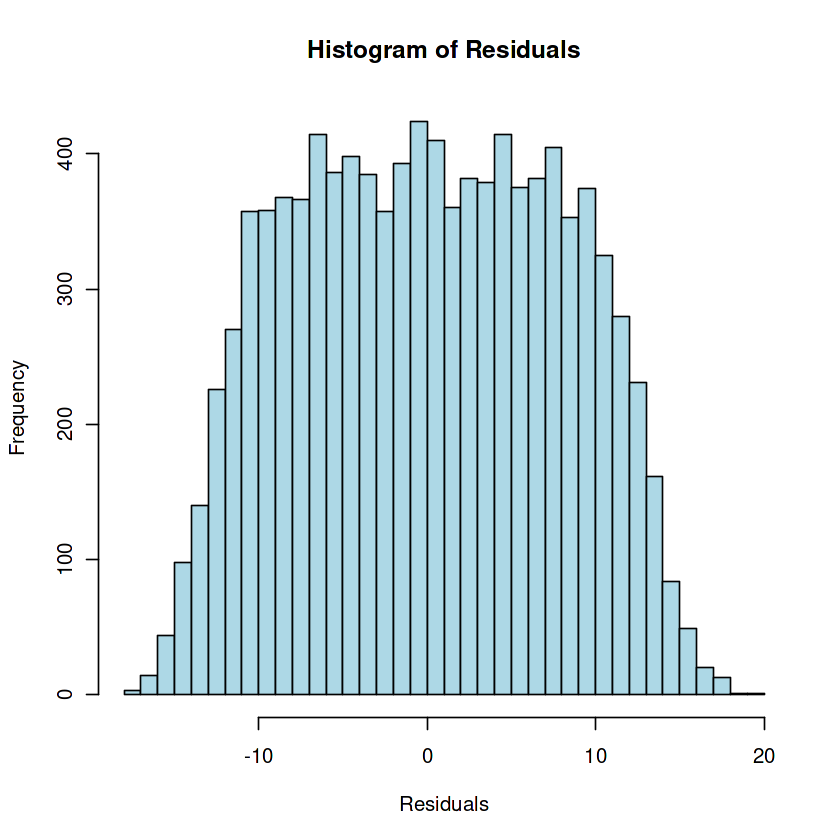

In [19]:
# Histogram of residuals
hist(residuals(model), breaks = 30, main = "Histogram of Residuals", xlab = "Residuals", col = "lightblue", border = "black")


Does the model follow OLS assumptions?          
How did you evaluate whether the linear regression model meets the assumptions required for Ordinary Least Squares (OLS) estimation?
                  


**d)** SLR Validation:                          (1 mark) <br>
Evaluate the overall goodness-of-fit of the linear regression model.
Test whether the overall model is statistically significant using F-statistic.Mention the null and alternative hypotheses.

R-Squared Value: This value is part of the model summary and indicates the proportion of variance explained by the model. Higher values suggest a better fit.

F-Statistic: This is also part of the model summary output. It tests the overall significance of the model.

Hypotheses for the F-Test
Null Hypothesis (H₀): The null hypothesis states that all the coefficients of the predictor variables are equal to zero, implying that the model does not explain the variability of the dependent variable better than a model with no predictors. Mathematically, 𝐻0:𝛽1=0


Alternative Hypothesis (Hₐ): The alternative hypothesis states that at least one of the coefficients of the predictor variables is not zero, meaning that the model does explain some of the variability in the dependent variable. Mathematically, 𝐻1:At least one 𝛽𝑖≠0H1

In [20]:
#Write your code here
model_summary <- summary(model)
print(model_summary)

# Extract the F-statistic and p-value
f_statistic <- model_summary$fstatistic
p_value <- pf(f_statistic[1], f_statistic[2], f_statistic[3], lower.tail = FALSE)
print(paste("F-statistic:", f_statistic[1]))
print(paste("p-value:", p_value))


Call:
lm(formula = Academic_Performance_Score ~ Previous_Exam_Scores, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -15.181799   0.319605   -47.5   <2e-16 ***
Previous_Exam_Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16

[1] "F-statistic: 51555.1100245522"
[1] "p-value: 0"


Given the output:

F-statistic: 51555.1100245522
p-value: 0
Here's what these values imply:

Interpretation of the F-Statistic
F-Statistic: The F-statistic value of 51555.11 is extremely large. The F-statistic measures the ratio of the variance explained by the model to the variance unexplained by the model. A large F-statistic suggests that the model explains a substantial amount of the variance in the dependent variable compared to the variance left unexplained by the model.
Interpretation of the p-Value
p-Value: A p-value of 0 (or practically zero, as it might be a very small number close to zero) indicates that the probability of observing such an extreme F-statistic under the null hypothesis (that all regression coefficients are zero) is extremely low. In statistical terms, this p-value is far below typical significance levels like 0.05 or 0.01.
Conclusion
Given these results:

Statistical Significance: The p-value being close to zero means that you reject the null hypothesis with very high confidence. This implies that at least one of the predictor variables in the model is statistically significant.

Model Goodness-of-Fit: The very large F-statistic suggests that the model provides a significantly better fit to the data compared to a model with no predictors. This indicates that the predictor variable (Previous_Exam_Score in this case) has a substantial impact on explaining the variability in the Performance_Index.

Summary: The results imply that your linear regression model is statistically significant and effectively explains the variability in the dependent variable. The predictors you have included are likely to be meaningful in predicting the Performance_Index, and the model is performing well in terms of overall fit.

### 2. Multiple Linear Regression                        (4 marks)

For our Multiple Linear Regression models, we could use all the attributes and try to predict the target variable. But the aim is to always predict the maximum variation in the target, with the minimum variables.

Thus, it's important to identify which features are most important to predict our target variable. Use the help of a correlogram to visually analyze the correlation between different independent variables and the one dependent variable. 


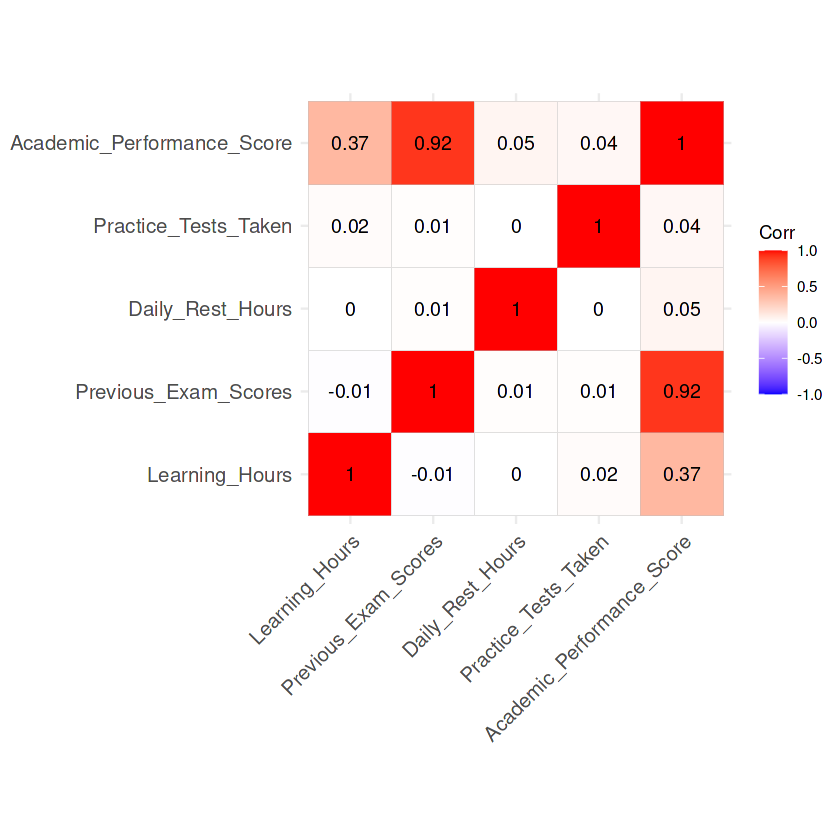

In [21]:
## Before constructing a correlogram, you will have to convert all categorical values to numerical values (Club_Participation column)

# Load necessary libraries
library(ggcorrplot)
library(dplyr)

# Select only numeric columns for correlation
numeric_data <- select_if(data, is.numeric)




## Then proceed to create the correlogram
# Create the correlation matrix
cor_matrix <- cor(numeric_data)

# Plot the correlogram
ggcorrplot(cor_matrix, lab = TRUE)

**1**) Use different variables to create the Multiple Linear Regression model. <br>

In [22]:
## Write your code here
model2 <- lm(Academic_Performance_Score ~ Learning_Hours + Previous_Exam_Scores + Daily_Rest_Hours + Practice_Tests_Taken , data = data)

summary(model2)



Call:
lm(formula = Academic_Performance_Score ~ Learning_Hours + Previous_Exam_Scores + 
    Daily_Rest_Hours + Practice_Tests_Taken, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3299 -1.3831 -0.0062  1.3701  8.4864 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -33.763726   0.126841 -266.19   <2e-16 ***
Learning_Hours         2.853429   0.007962  358.40   <2e-16 ***
Previous_Exam_Scores   1.018584   0.001189  857.02   <2e-16 ***
Daily_Rest_Hours       0.476333   0.012153   39.19   <2e-16 ***
Practice_Tests_Taken   0.195198   0.007189   27.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.061 on 9995 degrees of freedom
Multiple R-squared:  0.9885,	Adjusted R-squared:  0.9885 
F-statistic: 2.147e+05 on 4 and 9995 DF,  p-value: < 2.2e-16


Is there any correlation between independent variables.Why it is important to do this?

Which are the most important variables to predict the Performance Index?



Is there any correlation between independent variables?
* Learing Hours and Previous Exam Scores: These variables have a very weak correlation of -0.01, meaning they are almost uncorrelated.
* Academic Performance Score and Previous Exam Scores: There is a strong positive correlation(0.92), which means these two variables are highly related.
* Learning Hours and Academic Performance Score: The correlation is moderate(0.37), showing some relationship between the two variables.
* Other variables: Daily_Rest_Hours and Practice_Tests_Taken have very low correlation with most other variables,indicating they are largely independent.

Why it is important to do this?
* Checking for correlation helps identify multicollinearity, which occurs when two or more independent variables are higly correlated.While Academic Performance Score and Previous Exam Scores have a strong correlation, the other variables multilinearity concerns.
* Mulitcollinearity can make it difficult to determine the individual effect of each variable, leading to unstable estimates and inflated standard errors.

Which are the most important variables to predict the Performance Index?
Based on correlation with Academic Performance Score:
* Previous Exam Scores are strong postive correlation(0.92), making a significant predictor.
* Learning Hours has a moderate positive correlation(0.37), making it likely to have influence on predicted performance.
* Practice Tests Taken and Daily Rest Hours have very low correlation with Academic Performance Score, indicating that they may not be important.

So, the most important variables for predicting the Performance Index are:
1. Previous Exam Score(Strong correlation)
2. Learning Hours(Moderate correlation)

**Good job with the analysis!**